# **Librerias**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
!pip install category_encoders
import category_encoders as ce
import warnings


## **Cargado de datos**

**Este set de datos contiene alrededor de 10 años de observaciones meteorológicas diarias en diferentes localizaciones de Australia.**

**El objetivo es la predicción de las columnas 'RainTomorrow' y 'RainfallTomorrow' en función del resto de las características que se consideren adecuadas.**

In [ ]:
archivo = pd.read_csv('/content/drive/MyDrive/TPAprendizaje/weatherAUS.csv')
archivo.head(3)

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0


# **Exploración de los datos**

In [ ]:
#NOMBRE DE LAS COLUMNAS
[x for x in archivo.columns]

['Unnamed: 0',
 'Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow',
 'RainfallTomorrow']

**El dataset contiene 24 características relevantes con información climática:**

*   Date: fecha de la observación.
*   Location: nombre de las ubicaciones.
*   MinTemp y MaxTemp: valores max. y min. de temperaturas en °C.
*   Rainfall: milímetros de lluvia en el día.
*   Evaportion: mm de evaporación diarias.
*   Sunshine: horas de sol durante el día.
*   WindGustDir: direcciones de las rafagas de viento.
*   WindGustSpeed: velocidad en km/h de las rafagas de viento diarias.
*   WindDir9am/WindDir3pm: direcciones del viento a las 9am y 3pm.
*   WindSpeed9am/WindSpeed3pm: velocidad del viento a las 9am y 3pm.
*   Humidity9am/Humidity3pm: porcentaje de humedad a las 9am y 3pm.
*   Pressure9am/Pressure3pm: presión atmosférica en hpa a las 9am y 3pm.
*   Cloud9am/Cloud3pm: nivel de nubosidad en octales a las 9am y 3pm.
*   Temp9am/Temp3pm: temperatura en °C a las 9am y 3pm.
*   RainToday: booleano 1 si la precipitación supera los 1mm (0 contrario).
*   RainTomorrow: cantidad de lluvia al día siguiente en mm.
*   RainfallTomorrow: booleano 1 si llovio al día siguiente (0 contrario).


**Para el objetivo de las predicciones solo me quedo con los registros para cinco localizaciones.**

In [ ]:
#SELECCIONAR LAS CIUDADES DE INTERES
ciudades = ['Sydney', 'SydneyAirport', 'Canberra', 'Melbourne' , 'MelbourneAirport']
archivo.query('Location.isin(@ciudades)',inplace=True)

#ELIMINO LA COLUMNA 0 Y RESETEO EL INDICE DE PD
archivo.drop(archivo.columns[0], axis=1, inplace=True)
archivo.reset_index(drop=True, inplace=True)

In [ ]:
#Tamaño del archivo seleccionado
print(f'Tamaño del dataset:\n{archivo.shape[0]} filas - {archivo.shape[1]} columnas')

Tamaño del dataset:
15986 filas - 24 columnas


In [ ]:
#INFORMACIÓN SOBRE EL DATAFRAME
archivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15986 entries, 0 to 15985
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              15986 non-null  object 
 1   Location          15986 non-null  object 
 2   MinTemp           15495 non-null  float64
 3   MaxTemp           15500 non-null  float64
 4   Rainfall          15199 non-null  float64
 5   Evaporation       14280 non-null  float64
 6   Sunshine          14038 non-null  float64
 7   WindGustDir       14529 non-null  object 
 8   WindGustSpeed     14531 non-null  float64
 9   WindDir9am        15291 non-null  object 
 10  WindDir3pm        15696 non-null  object 
 11  WindSpeed9am      15725 non-null  float64
 12  WindSpeed3pm      15737 non-null  float64
 13  Humidity9am       15416 non-null  float64
 14  Humidity3pm       15461 non-null  float64
 15  Pressure9am       15251 non-null  float64
 16  Pressure3pm       15260 non-null  float6

In [ ]:
#CANTIDAD DE VALORES FALTANTES PARA CADA COLUMNA
archivo.isnull().sum()

Date                   0
Location               0
MinTemp              491
MaxTemp              486
Rainfall             787
Evaporation         1706
Sunshine            1948
WindGustDir         1457
WindGustSpeed       1455
WindDir9am           695
WindDir3pm           290
WindSpeed9am         261
WindSpeed3pm         249
Humidity9am          570
Humidity3pm          525
Pressure9am          735
Pressure3pm          726
Cloud9am            2677
Cloud3pm            2932
Temp9am              505
Temp3pm              496
RainToday            787
RainTomorrow         787
RainfallTomorrow     787
dtype: int64

**El dataset contiene columnas con variables numéricas y categóricas. Las categóricas son del tipo 'object' y las numéricas del tipo 'float64'.**

**Para ambos tipos se detectan presencia de valores faltantes.**

In [ ]:
#ANÁLISIS DESCRIPTIVO DE LAS VARIABLES NUMÉRICAS
archivo.describe() #include='all' PARA VER DESCRIPCIÓN DE VARIABLES CATEGÓRICAS

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,15495.000000,15500.000000,15199.000000,14280.000000,14038.000000,14531.000000,15725.000000,15737.000000,15416.000000,15461.000000,15251.000000,15260.000000,13309.000000,13054.000000,15481.000000,15490.000000,15199.000000
mean,11.605221,21.751781,2.303744,4.866828,6.854694,44.417315,16.613672,21.797166,68.903023,51.280577,1018.305836,1016.064239,4.750545,4.746131,15.545953,20.229154,2.302586
std,5.851347,6.053679,7.385992,3.069869,3.842419,14.958027,10.336386,9.518033,15.614788,17.721335,7.400730,7.265386,2.728329,2.589879,5.559295,5.857956,7.385251
min,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,3.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000
25%,7.900000,17.100000,0.000000,2.600000,3.700000,33.000000,9.000000,15.000000,59.000000,39.000000,1013.400000,1011.200000,2.000000,2.000000,11.600000,15.900000,0.000000
50%,11.600000,21.300000,0.000000,4.200000,7.500000,43.000000,15.000000,20.000000,70.000000,51.000000,1018.500000,1016.300000,6.000000,6.000000,15.400000,19.800000,0.000000
75%,15.800000,25.800000,0.800000,6.600000,10.000000,54.000000,22.000000,28.000000,80.000000,62.000000,1023.300000,1021.000000,7.000000,7.000000,19.500000,24.100000,0.800000
max,30.500000,46.800000,119.400000,23.800000,13.900000,122.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.200000,46.100000,119.400000


In [ ]:
umbral = 800  # Define el umbral como el límite superior de valores nulos permitidos

# Elimina filas en las que al menos una columna tiene más de 800 valores nulos
archivo = archivo.dropna(subset=archivo.columns[archivo.isnull().sum() < umbral], how='any')

**Decido eliminar las filas que contienen valores nulos y para eso establezco un umbral de tolerancia de 800 Nan como máximo y no descartar demasiadas.**

**Las estadísticas finales parecen mejorar un poco eliminando algunos registros que imputandolos a todos por su media en el caso de las caractértisctas numéricas y por la moda en las categóricas.**

## **Visualización de los datos**

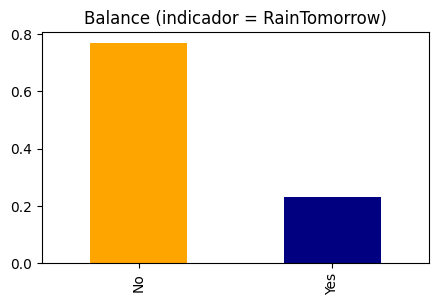

In [ ]:
plt.figure(figsize = (5,3))
archivo['RainTomorrow'].value_counts(normalize=True).plot(kind='bar',
                                            color= ['orange','navy'])
plt.title('Balance (indicador = RainTomorrow)')
plt.show()

In [ ]:
#Frecuencia de la distribución
(archivo['RainTomorrow'].value_counts()/len(archivo)).round(2)

No     0.77
Yes    0.23
Name: RainTomorrow, dtype: float64


**Se puede notar un desbalance en los datos de aproximadamente 77/23**

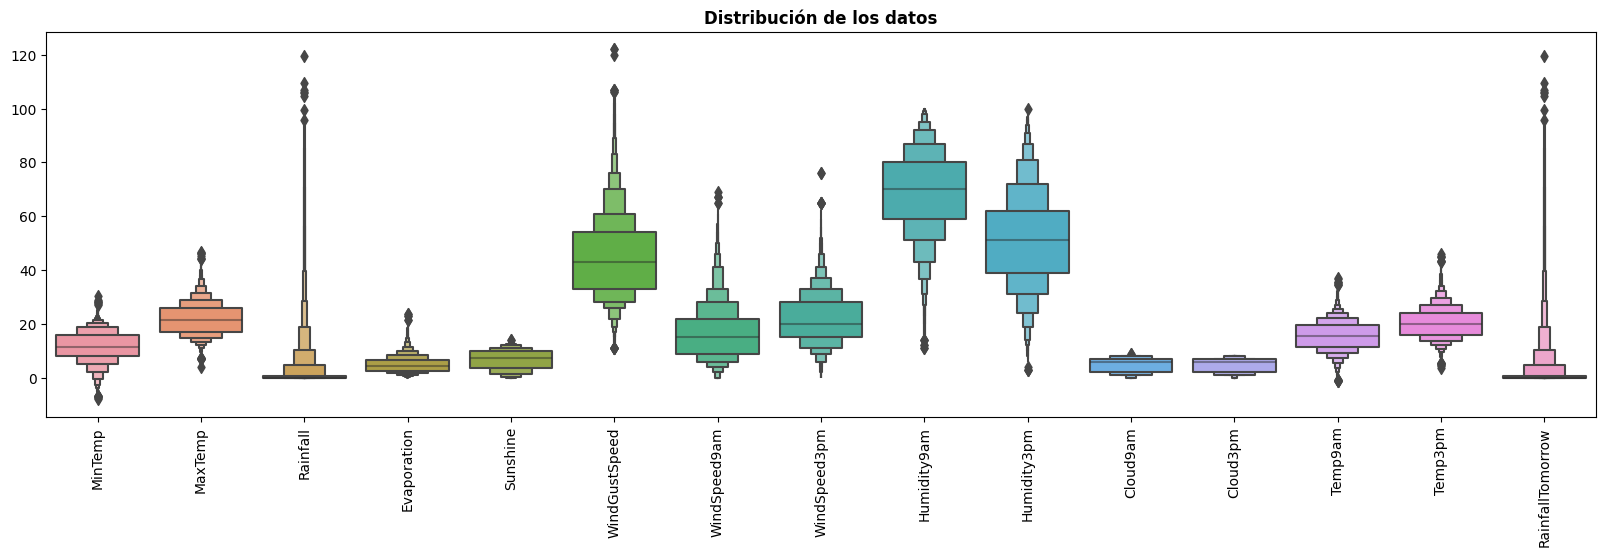

In [ ]:
plt.figure(figsize=(20,5))
sns.boxenplot(data=archivo.drop(['Pressure9am','Pressure3pm'],axis=1), orient='v')
plt.xticks(rotation=90)
plt.title('Distribución de los datos',fontweight='bold')
plt.show()

**Se puede notar la presencia de outliers en 'Rainfall', 'WindGustSpeed', 'WindSpeed3pm' y 'RainfallTomorrow'.**

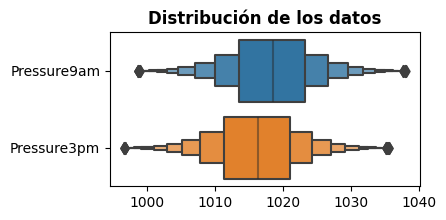

In [ ]:
plt.figure(figsize=(4,2))
sns.boxenplot(data=archivo[['Pressure9am','Pressure3pm']], orient='h')
plt.xticks(rotation=0)
plt.title('Distribución de los datos',fontweight='bold')
plt.show()

In [ ]:
#Elimino outliers
"""columnas_con_outliers = archivo[['Rainfall','WindGustSpeed','WindSpeed3pm','RainfallTomorrow']]

Q1 = columnas_con_outliers.quantile(0.25)
Q3 = columnas_con_outliers.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

for columna in columnas_con_outliers.columns:
    archivo[columna] = archivo[columna][(archivo[columna] >= limite_inferior[columna]) & (archivo[columna] <= limite_superior[columna])]"""

**Procedo a eliminar outliers para mejorar la representación de los datos(?)**

***-Comentario: si elimino outliers el r2 disminuye considerablemente-***

In [ ]:
#Tamaño del archivo luego de los reajuste
archivo.shape

(14208, 24)

**La reducción fue aproximadamente de un 5%, lo que no deberia ser significativo.**

In [ ]:
#Pairplot para observar la correlación de las variables
sns.pairplot( data=archivo, vars=(archivo.select_dtypes(exclude=['object'])), hue='RainfallTomorrow' )
plt.suptitle('Relación entre las variables',fontweight='bold', y=1.02)
plt.show()

# **Análisis de datos**

In [ ]:
#Remplazo los valores 'Yes' y 'No' en la columna 'RainTomorrow por 0 y 1.
archivo['RainTomorrow'] = archivo['RainTomorrow'].replace({'Yes': 1, 'No': 0})

**Quiero observar esta característica en una matriz de correlación y por eso hago un replace en este momento.**

**Datos faltantes**

In [ ]:
#RELLENO DE DATOS CATEGÓRICOS
variables_categoricas = ['WindGustDir','WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for x in variables_categoricas: archivo[x].fillna(archivo[x].mode()[0], inplace = True)

In [ ]:
#RELLENO DE DATOS NUMÉRICOS
variables_numericas = archivo.select_dtypes(exclude=['object']).columns.tolist()

for serie in variables_numericas:
  media = archivo.groupby(['Location'])[serie].transform('mean').round(2)
  archivo[serie].fillna(media, inplace=True)

**Para tratar los datos faltantes se rellena a las variables categóricas con la moda de cada columna y las variables numéricas con la media de cada columna según su ubicación(Location).**

In [ ]:
#RESULTADO DE RELLENAR LOS VALORES FALTANTES
archivo.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
dtype: int64

## **Matriz de correlación**

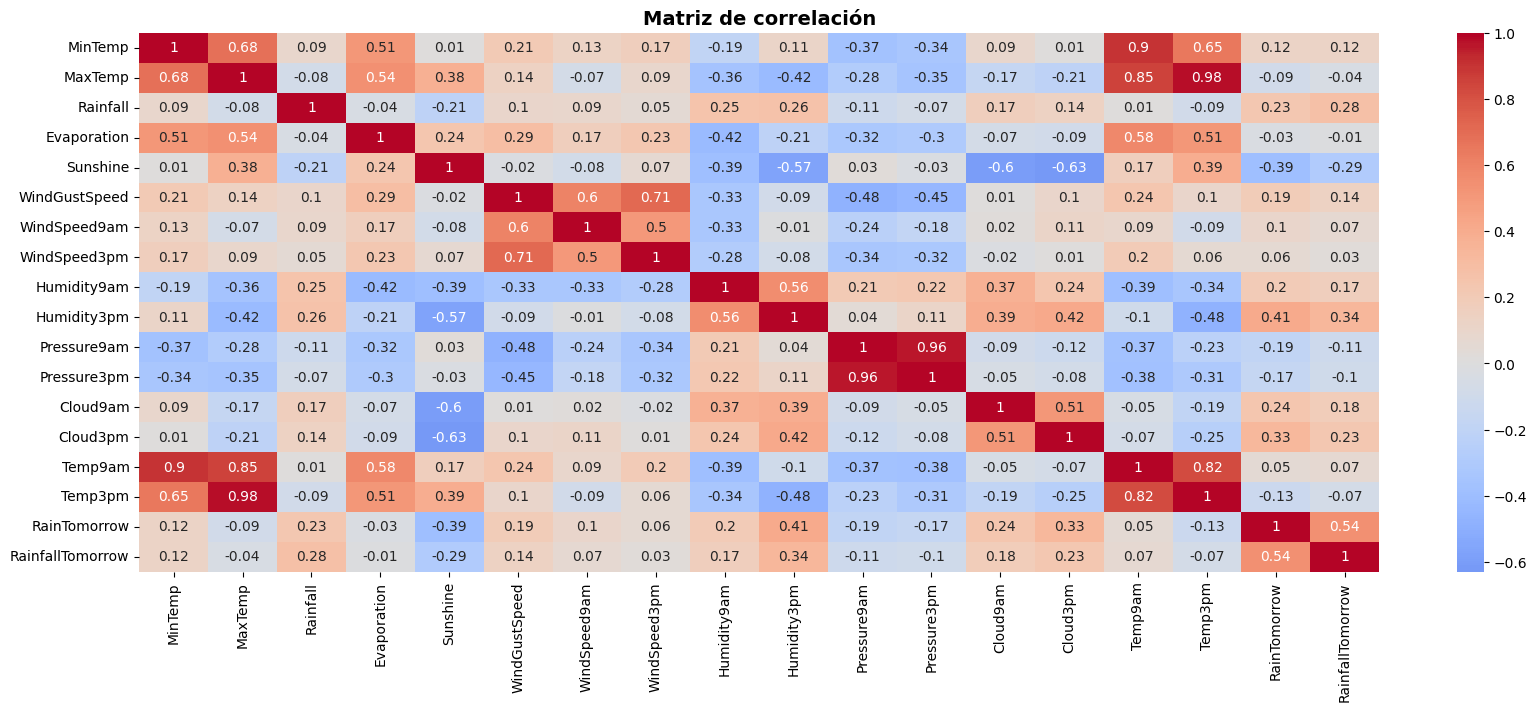

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)
corr = archivo.corr().round(2)
plt.figure(figsize=(20, 7))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title('Matriz de correlación',fontweight='bold',fontsize=14)
plt.show()

**Interpretación de la matriz de correlación:**

1.   MinTemp y MaxTemp (CC = 0.68)
2.   MinTemp y Temp9am (CC = 0.90)
3.   MaxTemp y Temp9am (CC = 0.85)
4.   MinTemp y Temp3Pm (CC = 0.98)
5.   WindGustSpeed y WindSpeed3pm (CC = 0.71)
6.   Pressure9am y Pressure3pm (CC = 0.96)
7.   Temp9am y Temp3pm (CC = 0.82)

**Estas caracteristicas se encuentran correlacionadas de una manera positiva fuertemente.**

In [ ]:
#CODIFICACIÓN DE LAS COLUMNAS CATEGÓRICAS

#Codificación de la columna que almacena las fechas 'Date'
archivo['Date'] = pd.to_datetime(archivo['Date'], format='%Y-%m-%d')
archivo['Dia'] = archivo['Date'].dt.day
archivo['Mes'] = archivo['Date'].dt.month
archivo['Año'] = archivo['Date'].dt.year
archivo.drop('Date', axis=1, inplace=True)

#One-Hot en las columnas 'RainToday' y 'RainTomorrow'
archivo = pd.get_dummies(data=archivo, columns = ['RainToday','RainTomorrow',], drop_first=True)

#Label encoder para las demas columnas de variables categóricas
variables = archivo.select_dtypes(include=['object']).columns.tolist()
encoder = ce.BinaryEncoder(cols=variables)
archivo = encoder.fit_transform(archivo)

In [ ]:
archivo.columns

Index(['Location_0', 'Location_1', 'Location_2', 'MinTemp', 'MaxTemp',
       'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir_0', 'WindGustDir_1',
       'WindGustDir_2', 'WindGustDir_3', 'WindGustDir_4', 'WindGustSpeed',
       'WindDir9am_0', 'WindDir9am_1', 'WindDir9am_2', 'WindDir9am_3',
       'WindDir9am_4', 'WindDir3pm_0', 'WindDir3pm_1', 'WindDir3pm_2',
       'WindDir3pm_3', 'WindDir3pm_4', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainfallTomorrow', 'Dia', 'Mes',
       'Año', 'RainToday_Yes', 'RainTomorrow_1'],
      dtype='object')

## **Train test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(archivo.drop(['RainfallTomorrow','RainTomorrow_1'], axis=1),
                                             archivo['RainfallTomorrow'].values.reshape(-1,1),
                                             test_size=0.2,
                                             random_state=12,)

#Tamaño de cada uno de los conjuntos
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
#ESTANDARIZAR LOS DATOS
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

**Estandarizo para equiparar el modelado de datos y mejorar el desempeño del descenso de gradiente y la regularización.**

## **Regresión**

In [ ]:
lr = LinearRegression(fit_intercept=True)

lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Pendiente e intercepto
lr.coef_, lr.intercept_

(array([[-1.45461249, -0.58022758,  0.1905765 , -0.16069883,  0.14055615,
          0.16573768,  0.0444838 , -0.34904904,  0.06593456,  0.66436952,
         -0.15093465, -0.06887611, -0.5426439 ,  0.10483732,  0.26816414,
          0.09809962, -0.20897598, -0.44375359,  0.00203847, -0.02888557,
         -0.18646047,  0.08237514, -0.03060155,  0.15745974,  0.01758799,
         -0.06330172, -0.01931343,  0.14620163,  0.30605613, -0.345581  ,
         -0.1193701 ,  0.07027711, -0.02943665,  0.11424545,  0.00549407,
         -0.01058695, -0.01539492,  0.36943765]]),
 array([63.04528547]))

In [ ]:
# Predicciones test
y_pred = lr.predict(X_test)

#Coeficiente de regresión (R2 train y test)
r2_train, r2_test = lr.score(X_train,y_train), lr.score(X_test,y_test)

#Error cuadrático medio
mse_lr = mean_squared_error(y_test, y_pred)

#Error Rmse del modelo
rmse_lr = mean_squared_error(y_test, y_pred, squared = False)

#Error absoluto medio
mae_lr = mean_absolute_error(y_test, y_pred)

#Error porcentual absoluto medio
#mape_lr = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'El R2 del test es: {r2_test}')
print(f'El R2 del entrenamiento es: {r2_train}')
print(f'El mse es: {mse_lr}')
print(f'El rmse es: {rmse_lr}')
print(f'El error mae es: {mae_lr.round(4)}')
#print(f'El mape es: {mape_lr}')

El R2 del test es: 0.23169511583641456
El R2 del entrenamiento es: 0.2396469137468159
El mse es: 49.32719806948815
El rmse es: 7.0233324048836066
El error mae es: 3.2832


## **Gradiente descendiente**

In [ ]:
def gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):

    n, m = X_train.shape[0], X_train.shape[1]
    o = X_test.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((o, 1)), X_test))

    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors, test_errors  = [], []

    for i in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_test, W)
        error_test = y_test - prediction_test
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    plt.figure(figsize=(5, 4))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de test')
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
    plt.show()

    return W

In [ ]:
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):

    n, m = X_train.shape[0], X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors, test_errors = [], []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = error ** 2
            train_errors.append(train_mse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(8, 4))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return W

In [ ]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n, m = X_train.shape[0], X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors, test_errors = [], []

    for i in range(epochs):

        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(5, 4))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

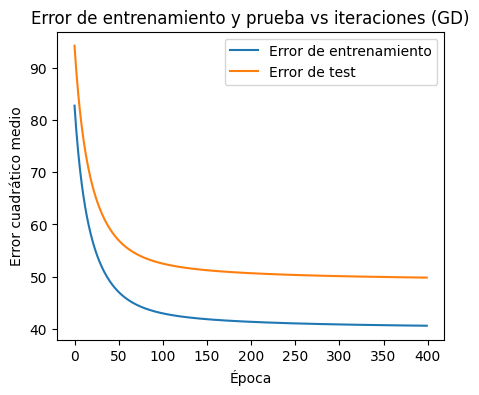

In [ ]:
gd = gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, lr=0.01, epochs=400)

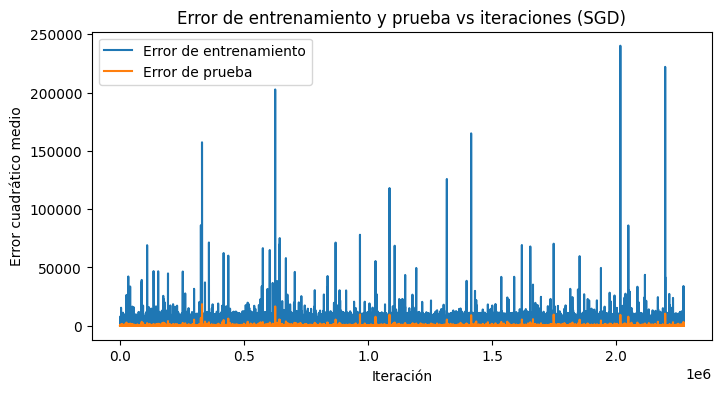

In [ ]:
sgd = stochastic_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, lr=0.01, epochs=200)

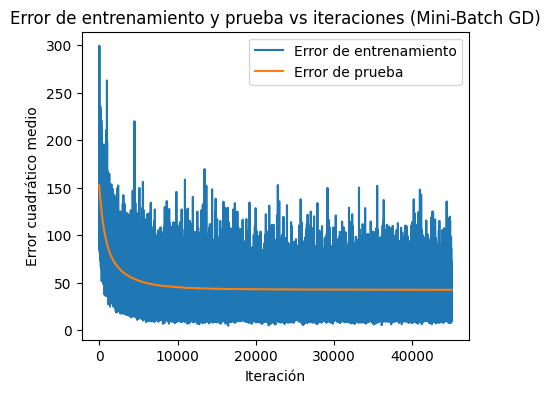

In [ ]:
mbgd = mini_batch_gradient_descent(X_train_scaled, y_train, X_test_scaled, y_test, lr=0.0001, epochs=1000, batch_size=256)

## **Regularización**

### **Ridge**

In [ ]:
modelo = RidgeCV(alphas = np.logspace(-10, 10, 200),
                 fit_intercept   = True,
                 store_cv_values = True)
modelo.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e-10, 1.26038293e-10, 1.58856513e-10, 2.00220037e-10,
       2.52353917e-10, 3.18062569e-10, 4.00880633e-10, 5.05263107e-10,
       6.36824994e-10, 8.02643352e-10, 1.01163798e-09, 1.27505124e-09,
       1.60705282e-09, 2.02550194e-09, 2.55290807e-09, 3.21764175e-09,
       4.05546074e-09, 5.11143348e-09, 6.44236351e-09, 8.11984499e-09,
       1.02341140e-08, 1.28989026e-0...
       4.88025158e+07, 6.15098579e+07, 7.75259749e+07, 9.77124154e+07,
       1.23155060e+08, 1.55222536e+08, 1.95639834e+08, 2.46581108e+08,
       3.10786619e+08, 3.91710149e+08, 4.93704785e+08, 6.22257084e+08,
       7.84282206e+08, 9.88495905e+08, 1.24588336e+09, 1.57029012e+09,
       1.97916687e+09, 2.49450814e+09, 3.14403547e+09, 3.96268864e+09,
       4.99450512e+09, 6.29498899e+09, 7.93409667e+09, 1.00000000e+10]),
        store_cv_values=True)

In [ ]:
# Predicciones test
y_pred_ridge = modelo.predict(X_test_scaled)

#Coeficiente de regresión (R2 train y test)
r2_ridge = modelo.score(X_test_scaled,y_test)

#Error cuadrático medio
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

#Error Rmse del modelo
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared = False)

#Error absoluto medio
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

#Error porcentual absoluto medio
#mape_ridge = np.mean(np.abs((y_test - y_pred_ridge) / y_test)) * 100

print(f'El R2 del test es: {r2_ridge}')
print(f'El mse es: {mse_ridge}')
print(f'El rmse es: {rmse_ridge}')
print(f'El error mae es: {mae_ridge.round(4)}')
#print(f'El mape es: {mape_ridge}')

El R2 del test es: 0.23123436271199738
El mse es: 49.35677963417389
El rmse es: 7.025438038597586
El error mae es: 3.2766


### **Lasso**

In [ ]:
modelo = LassoCV(alphas=np.logspace(-10, 10, 200),cv=10)

_ = modelo.fit(X_train_scaled, y_train.ravel())

In [ ]:
# Predicciones test
y_pred_lasso = modelo.predict(X_test_scaled)

#Coeficiente de regresión (R2 train y test)
r2_lasso = modelo.score(X_test_scaled,y_test)

#Error cuadrático medio
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

#Error Rmse del modelo
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared = False)

#Error absoluto medio
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

#Error porcentual absoluto medio
#mape_lasso = np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100

print(f'El R2 del test es: {r2_lasso}')
print(f'El mse es: {mse_lasso}')
print(f'El rmse es: {rmse_lasso}')
print(f'El error mae es: {mae_lasso.round(4)}')
#print(f'El mape es: {mape_lasso}')

El R2 del test es: 0.23113266031835322
El mse es: 49.363309195834674
El rmse es: 7.025902731737372
El error mae es: 3.2635


### **ElasticNet**

In [ ]:
modelo = ElasticNetCV(l1_ratio = [0, 0.01, 0.05, 0.9, 0.35, 0.40],
                      alphas = np.logspace(-5, 10, 200),
                      cv = 5)

_ = modelo.fit(X_train_scaled, y_train)

In [ ]:
# Predicciones test
y_pred_elastic = modelo.predict(X_test_scaled)

#Coeficiente de regresión (R2 train y test)
r2_elastic = modelo.score(X_test_scaled,y_test)

#Error cuadrático medio
mse_elastic = mean_squared_error(y_test, y_pred_elastic)

#Error Rmse del modelo
rmse_elastic = mean_squared_error(y_test, y_pred_elastic, squared = False)

#Error absoluto medio
mae_elastic = mean_absolute_error(y_test, y_pred_elastic)

#Error porcentual absoluto medio
#mape_elastic = np.mean(np.abs((y_test - y_pred_elastic) / y_test)) * 100

print(f'El R2 del test es: {r2_elastic}')
print(f'El mse es: {mse_elastic}')
print(f'El rmse es: {rmse_elastic}')
print(f'El error mae es: {mae_elastic.round(4)}')
#print(f'El mape es: {mape_elastic}')

El R2 del test es: 0.2309621197920637
El mse es: 49.37425834700181
El rmse es: 7.026681887420393
El error mae es: 3.2631


### **Comparación entre modelos**

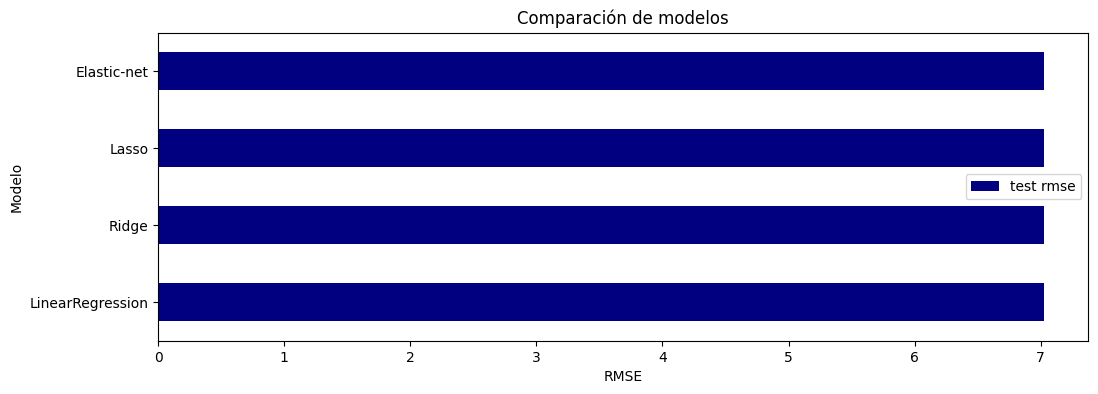

In [ ]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rmse_lr, rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(12, 4))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax, color='navy')
ax.set_xlabel('RMSE')
ax.set_ylabel('Modelo')
ax.set_title('Comparación de modelos');

## **Métricas**

In [ ]:
print(f'R2 en los diferentes modelos:\n-Regresión Lineal: {r2_test}\n-Ridge: {r2_ridge}\n-Lasso: {r2_lasso}\n-ElasticNet: {r2_elastic}')
print()
print(f'MSE en los diferentes modelos:\n-Regresión Lineal: {mse_lr}\n-Ridge:{mse_ridge}\n-Lasso: {mse_lasso}\n-ElasticNet: {mse_elastic}')
print()
print(f'RMSE en los diferentes modelos:\n-Regresión Lineal: {rmse_lr}\n-Ridge:{rmse_ridge}\n-Lasso: {rmse_lasso}\n-ElasticNet: {rmse_elastic}')
print()
print(f'MAE en los diferentes modelos:\n-Regresión Lineal: {mae_lr}\n-Ridge:{mae_ridge}\n-Lasso: {mae_lasso}\n-ElasticNet: {mae_elastic}')
print()
#print(f'MAPE en los diferentes modelos:\n-Regresión Lineal: {mape_lr}\n-Ridge:{mape_ridge}\n-Lasso: {mape_lasso}\n-ElasticNet: {mape_elastic}')

R2 en los diferentes modelos:
-Regresión Lineal: 0.23169511583641456
-Ridge: 0.23123436271199738
-Lasso: 0.23113266031835322
-ElasticNet: 0.2309621197920637

MSE en los diferentes modelos:
-Regresión Lineal: 49.32719806948815
-Ridge:49.35677963417389
-Lasso: 49.363309195834674
-ElasticNet: 49.37425834700181

RMSE en los diferentes modelos:
-Regresión Lineal: 7.0233324048836066
-Ridge:7.025438038597586
-Lasso: 7.025902731737372
-ElasticNet: 7.026681887420393

MAE en los diferentes modelos:
-Regresión Lineal: 3.2831542347540337
-Ridge:3.2765587142141706
-Lasso: 3.263450187698456
-ElasticNet: 3.2630596434078516



# **Clasificación**


In [ ]:
#Caracteristica a predecir
archivo['RainTomorrow_1']

0        1
1        1
2        1
3        1
4        1
        ..
15981    0
15982    0
15983    0
15984    1
15985    0
Name: RainTomorrow_1, Length: 14208, dtype: uint8

### **Train test split**

In [ ]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(archivo.drop(['RainfallTomorrow','RainTomorrow_1'], axis=1),
                                             archivo['RainTomorrow_1'].values.reshape(-1,1),
                                             test_size=0.2,
                                             random_state=12,)

In [ ]:
#ESTANDARIZAR LOS DATOS
X_train_scaled_log=scaler.fit_transform(X_train_log)
X_test_scaled_log=scaler.transform(X_test_log)

## **Regresión logística**

In [ ]:
logistic_model = LogisticRegression(random_state=12, class_weight='balanced')
logistic_model.fit(X_train_scaled_log, y_train_log.ravel())

LogisticRegression(class_weight='balanced', random_state=12)

### **Métricas**

In [ ]:
y_pred_log = logistic_model.predict(X_test_scaled_log)
y_ajuste_train = logistic_model.predict(X_train_scaled_log)

print('Métricas en el entrenamiento')
print(classification_report(y_train_log, y_ajuste_train))

print('Métricas en el conjunto de prueba')
print(classification_report(y_test_log, y_pred_log))

Métricas en el entrenamiento
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      8752
           1       0.52      0.76      0.61      2614

    accuracy                           0.78     11366
   macro avg       0.72      0.77      0.73     11366
weighted avg       0.82      0.78      0.79     11366

Métricas en el conjunto de prueba
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      2166
           1       0.53      0.77      0.63       676

    accuracy                           0.78      2842
   macro avg       0.72      0.78      0.74      2842
weighted avg       0.83      0.78      0.80      2842



In [ ]:
# PROBABILIDADES DE PREDICCIÓN DEL MODELO
y_probs = logistic_model.predict_proba(X_test_scaled)[:, 1]

# CALCULO LA ROC Y EL AUC
fpr, tpr, thresholds = roc_curve(y_test_log, y_probs)
roc_auc = auc(fpr, tpr)

In [ ]:
#MATRIZ DE CONFUSIÓN
cm_test = confusion_matrix(y_test_log, y_pred_log)
cm_train = confusion_matrix(y_train_log, y_ajuste_train)

VP = cm_test[0,0]
VN = cm_test[1,1]
FP = cm_test[0,1]
FN = cm_test[1,0]

In [ ]:
#ACCURACY
accuracy = (VP + VN) / float(VP + VN + FP + FN)

#PRESICIÓN
precision = VP / float(VP + FP)

#RECALL
recall = VP / float(VP + FN)

#F1-SCORE
f1 = 2* ((recall*precision)/(recall+precision))

pd.DataFrame({'Accuracy':[accuracy],'Precision':[precision],'Recall':[recall],'F1-Score':[f1]})

,Accuracy,Precision,Recall,F1-Score
0,0.784307,0.788089,0.917249,0.847778


### **Visualización matriz de confusión**

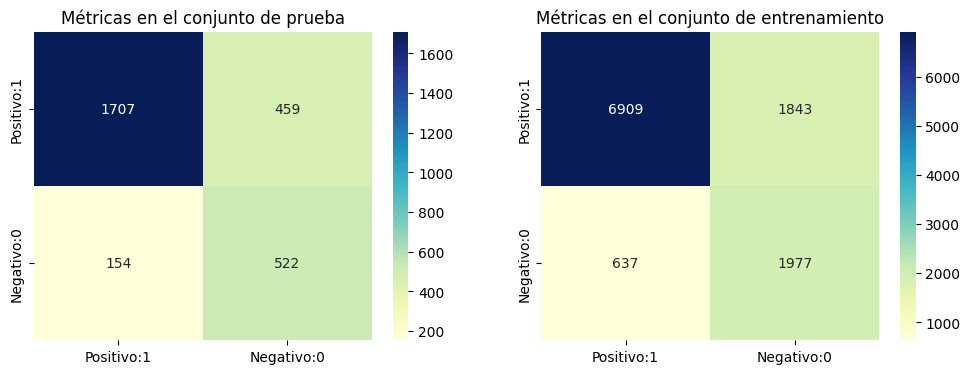

In [ ]:
# Matriz de confusión para el conjunto de prueba
cm_matriz_test = pd.DataFrame(data=cm_test, columns=['Positivo:1', 'Negativo:0'],
                                 index=['Positivo:1', 'Negativo:0'])

# Matriz de confusión para el conjunto de entrenamiento
cm_matriz_train = pd.DataFrame(data=cm_train, columns=['Positivo:1', 'Negativo:0'],
                                 index=['Positivo:1', 'Negativo:0'])

plt.figure(figsize=(12, 4))

# Subplot 1: Matriz de confusión para el conjunto de prueba
plt.subplot(121)
plt.title('Métricas en el conjunto de prueba')
sns.heatmap(cm_matriz_test, annot=True, fmt='d', cmap='YlGnBu')

# Subplot 2: Matriz de confusión para el conjunto de entrenamiento
plt.subplot(122)
plt.title('Métricas en el conjunto de entrenamiento')
sns.heatmap(cm_matriz_train, annot=True, fmt='d', cmap='YlGnBu')

plt.show()

### **Curva ROC**

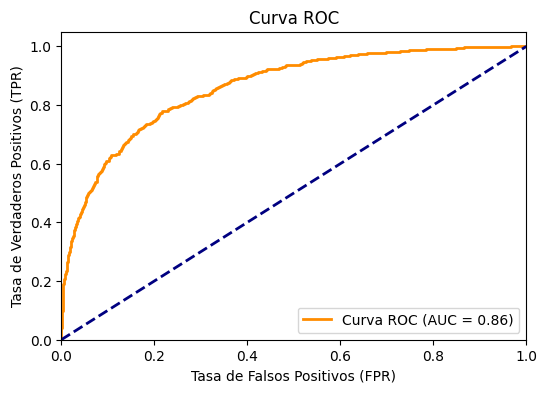

In [ ]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred = logistic_model.predict_proba(X_test_scaled)
probabildades = pd.DataFrame(data=y_pred, columns=['No llueve mañana (0)', 'LLuve mañana (1)'])
probabildades.head()

,No llueve mañana (0),LLuve mañana (1)
0,0.692538,0.307462
1,0.224964,0.775036
2,0.112165,0.887835
3,0.918888,0.081112
4,0.762140,0.237860


# **Modelo base de regresión y clasificación**

In [ ]:
#Modelo base para la clasificación
def prediccion(dataset,columna):
  promedio_lluvia = dataset[columna].mean()
  # Predicción para la lluvia al día siguiente
  prediccion_mm = promedio_lluvia
  print(f'Predicción de lluvia al día siguiente: {round(prediccion_mm,2)}mm')
  print()


#Modelo base para la regresión
def predecir_clasificacion(dataset,columna):
  contar_clase = dataset[columna].value_counts()

  # Selecciona la clase más frecuente como predicción
  clase_frecuente = contar_clase.idxmax()

  preddiccion_si_no = clase_frecuente
  if preddiccion_si_no == 0:
    print(f'Llueve mañana: No')
  else:
    print(f'Llueve mañana: Si')

In [ ]:
#Obtengo predicciones
prediccion(archivo,'RainfallTomorrow')

predecir_clasificacion(archivo,'RainTomorrow_1')

Predicción de lluvia al día siguiente: 2.29mm

Llueve mañana: No


### **Para la regresión se usa el calculo de la media como predicción del modelo base, mientras que para la clasificación se elige la clase mas frecuente.**

# **Redes neuronales**

## **Red neuronal para regresión**

### **Train-test split**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(archivo.drop(['RainfallTomorrow'], axis=1),
                                             archivo['RainfallTomorrow'].values.reshape(-1,1),
                                             test_size=0.2,
                                             random_state=12,)

In [ ]:
#ESTANDARIZAR LOS DATOS
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_nn)
X_test_scaled=scaler.transform(X_test_nn)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=[X_train_nn.shape[1]]),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

In [ ]:
# Compilación del modelo para regresión
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# Entrenamiento del modelo
model.fit(X_train_nn, y_train_nn, epochs=500, batch_size=128, validation_data=(X_test_nn, y_test_nn))

# Predicciones en el conjunto de prueba
predictions = model.predict(X_test_nn)

In [ ]:
# Error cuadrático medio (MSE)

mse = mean_squared_error(y_test_nn, predictions)
print(f'Mean Squared Error (MSE) regresión: {mse}')

# Error absoluto medio (MAE)

mae = mean_absolute_error(y_test_nn, predictions)
print(f'Mean Absolute Error (MAE) regresión: {mae}')

# R2
r2 = r2_score(y_test_nn, predictions)
print(f'R2 regresión: {r2}')

Mean Squared Error (MSE): 32.08883919730981
Mean Absolute Error (MAE): 1.8420117249965333
R2: 0.5001943583395418


In [ ]:
# Predicciones del modelo
predictions = model.predict(X_test_nn)

# Visualizamos los resultados de la regresión
plt.scatter(X_test_nn[:, 0], y_test_nn, label='Valores reales')
plt.scatter(X_test_nn[:, 0], predictions, color='red', label='Predicciones')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

## **Red neuronal para clasificación**

In [ ]:
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(archivo.drop(['RainfallTomorrow', 'RainTomorrow_1'], axis=1),
                                             archivo['RainTomorrow_1'].values.reshape(-1,1),
                                             test_size=0.2,
                                             random_state=12,)

In [ ]:
#ESTANDARIZAR LOS DATOS
X_train_scaled=scaler.fit_transform(X_train_nn)
X_test_scaled=scaler.transform(X_test_nn)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=X_train_nn.shape[1], activation='sigmoid')
])

In [ ]:
# Compilación del modelo para regresión
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
# Entrenamiento del modelo
model.fit(X_train_nn, y_train_nn, epochs=100, batch_size=32, validation_split=0.2)

In [ ]:
# Predicciones en el conjunto de prueba
predictions = model.predict(X_test_nn)
y_pred_nn = ((predictions) > 0.5).astype(int)

89/89 [==============================] - 0s 1ms/step


In [ ]:
# Informe de clasificación
class_report = classification_report(y_test_nn, y_pred_nn)
print("\nInforme de Clasificación:")
print(class_report)


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.63      0.75      2166
           1       0.41      0.83      0.55       676

    accuracy                           0.67      2842
   macro avg       0.66      0.73      0.65      2842
weighted avg       0.80      0.67      0.70      2842



In [ ]:
# Convertir las probabilidades a clases (0 o 1)
y_pred_classes = (y_pred_nn > 0.5).astype(int)

# Calcular métricas usando scikit-learn
accuracy = accuracy_score(y_test_nn, y_pred_classes)
precision = precision_score(y_test_nn, y_pred_classes)
recall = recall_score(y_test_nn, y_pred_classes)
f1 = f1_score(y_test_nn, y_pred_classes)
conf_matrix = confusion_matrix(y_test_nn, y_pred_classes)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.6738212526389866
Precision: 0.408327246165084
Recall: 0.8269230769230769
F1 Score: 0.5466992665036674
Confusion Matrix:
[[1356  810]
 [ 117  559]]


In [ ]:
# CALCULO LA ROC Y EL AUC
fpr, tpr, thresholds = roc_curve(y_test_nn, y_pred_nn)
roc_auc = auc(fpr, tpr)

In [ ]:
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()